<a href="https://colab.research.google.com/github/musabarshad/NLP-ASSIGNMENT/blob/main/IMDB_REVIEW_CLASSIFIERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Install Kaggle
!pip install kaggle

# Upload your Kaggle API key (kaggle.json)
from google.colab import files
files.upload()  # Upload kaggle.json here

# Set up Kaggle environment
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download a large IMDb dataset from Kaggle
!kaggle datasets download -d 'lakshmi25npathi/imdb-dataset-of-50k-movie-reviews'


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
  0% 0.00/25.7M [00:00<?, ?B/s]
100% 25.7M/25.7M [00:00<00:00, 303MB/s]


In [ ]:
!unzip imdb-dataset-of-50k-movie-reviews.zip



Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [ ]:
df=pd.read_csv('IMDB Dataset.csv')

<Axes: xlabel='count', ylabel='sentiment'>

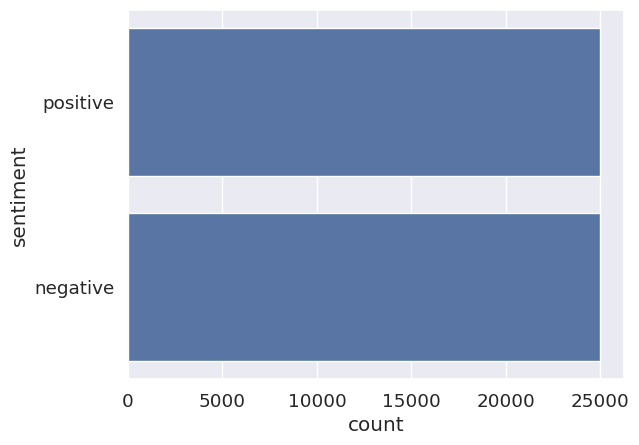

In [ ]:

sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(df.sentiment)

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


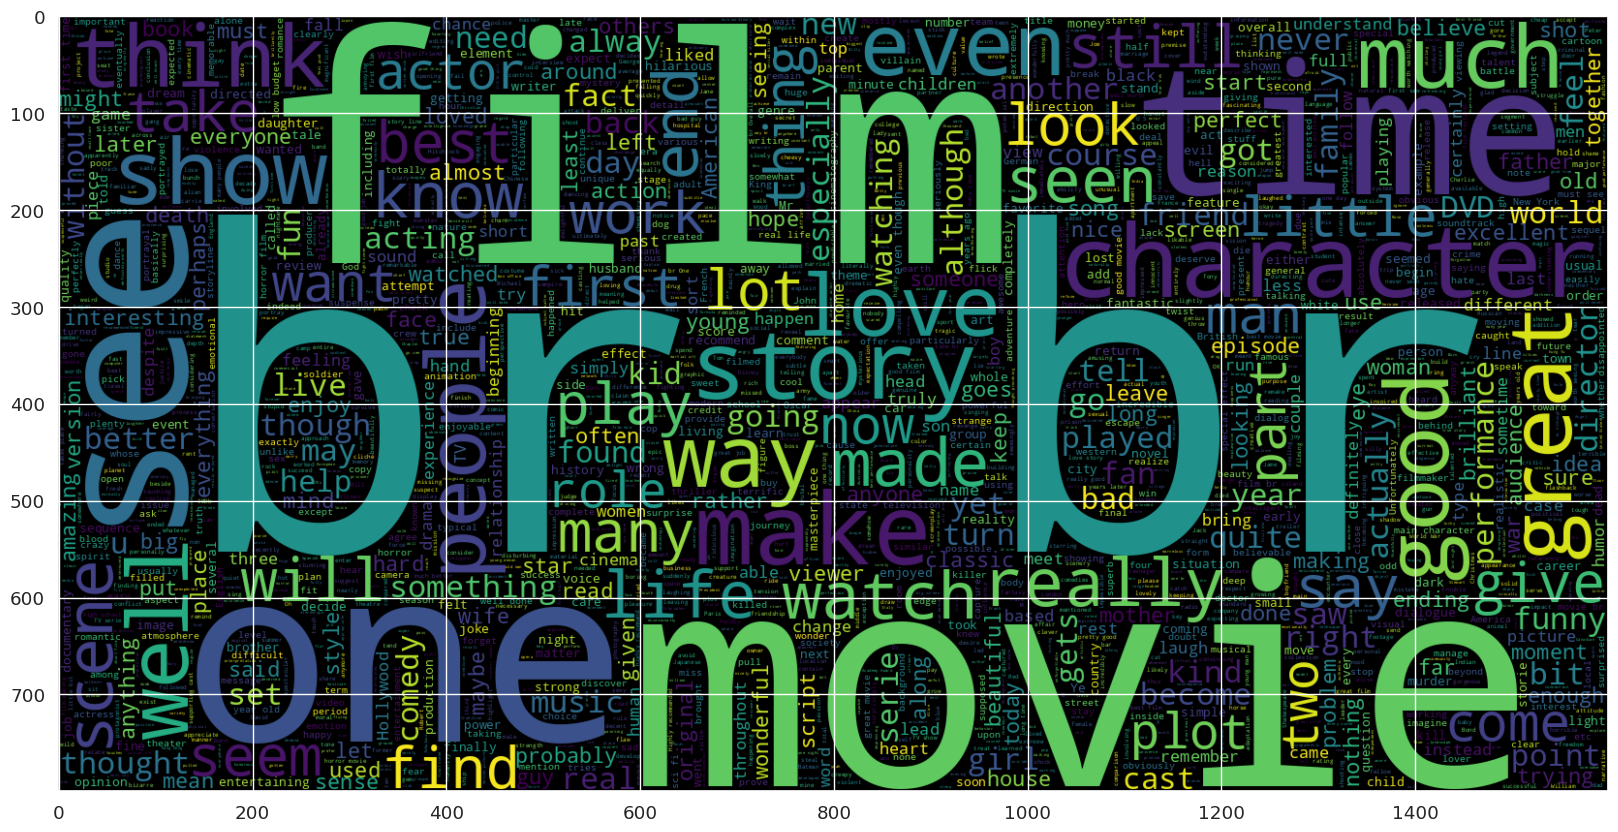

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'positive'].review))
plt.imshow(wc , interpolation = 'bilinear')

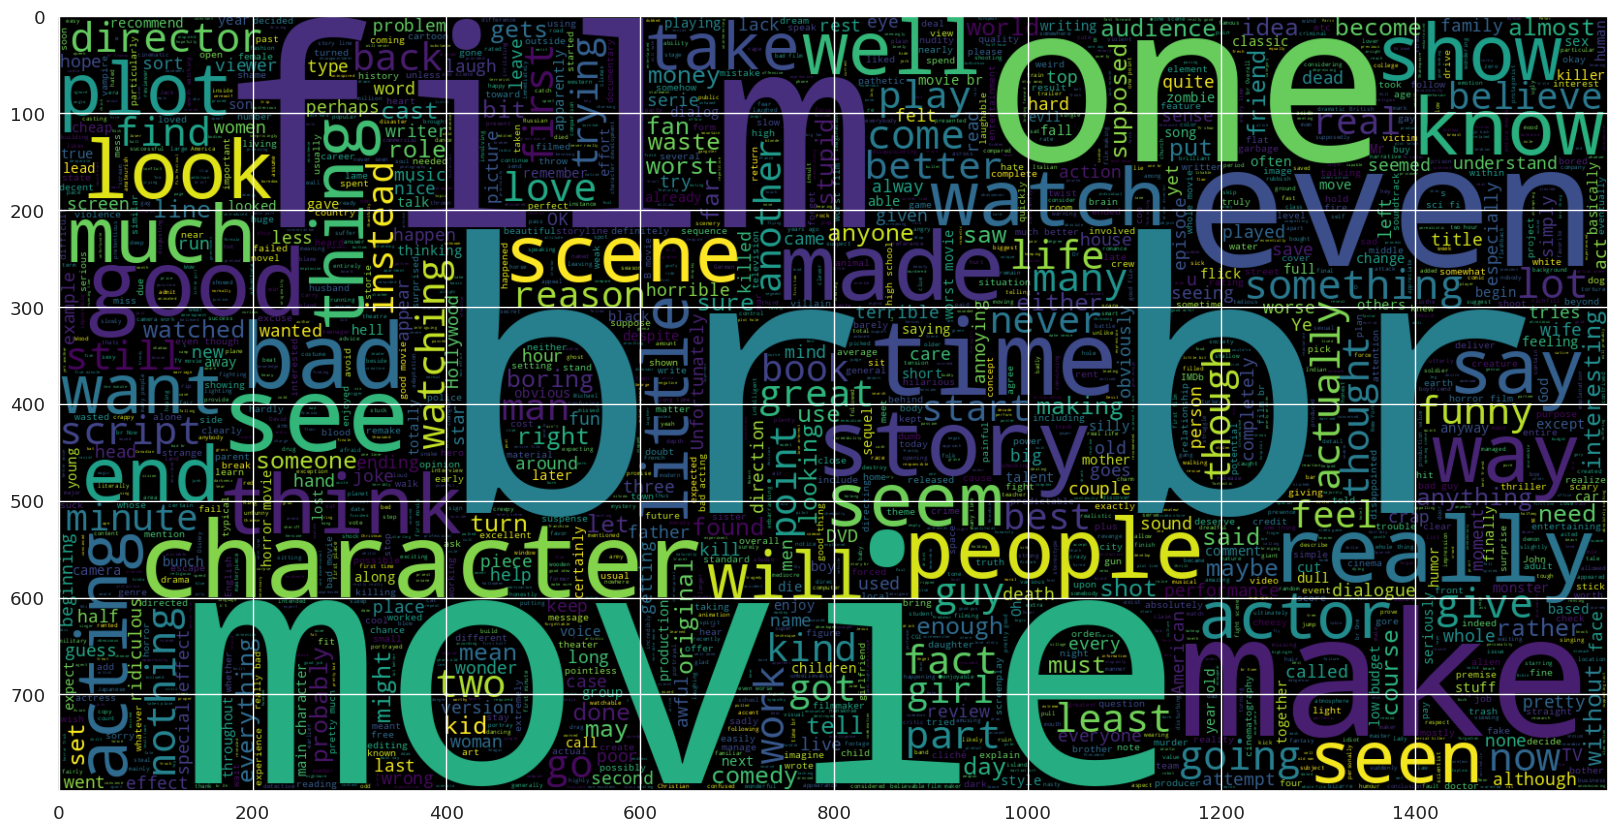

In [ ]:
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'negative'].review))
plt.imshow(wc , interpolation = 'bilinear')

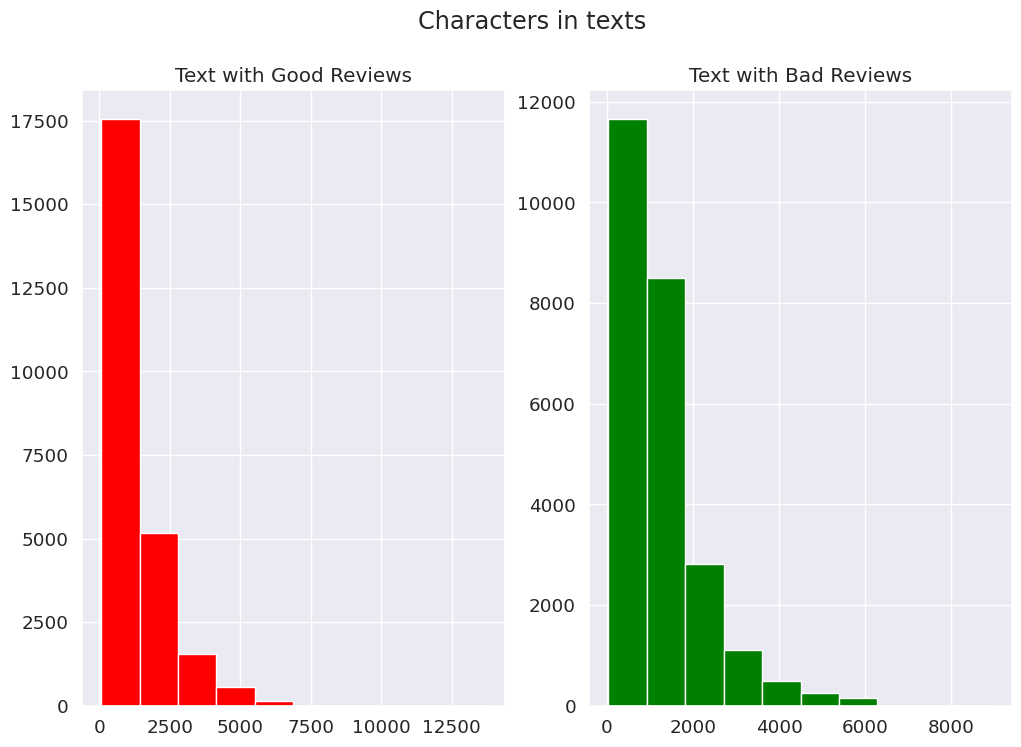

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['sentiment']=='positive']['review'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Text with Good Reviews')
text_len=df[df['sentiment']=='negative']['review'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Characters in texts')
plt.show()

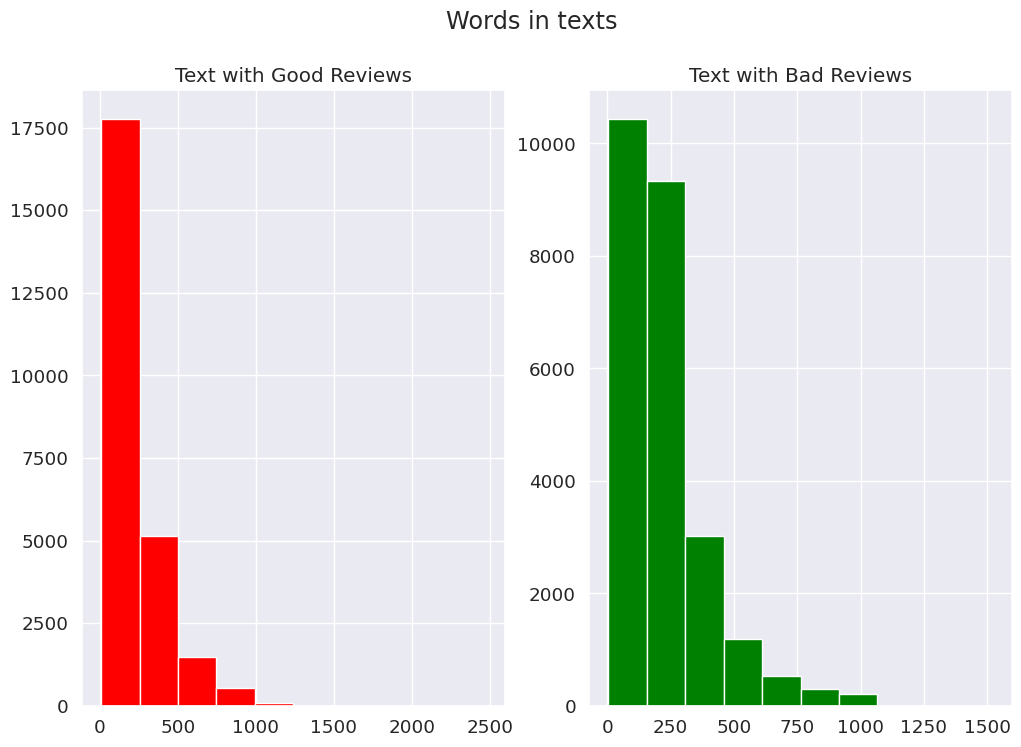

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['sentiment']=='positive']['review'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Text with Good Reviews')
text_len=df[df['sentiment']=='negative']['review'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Words in texts')
plt.show()


<ipython-input-15-381c4a71e0ea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
<ipython-input-15-381c4a71e0ea>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')


Text(0.5, 0.98, 'Average word length in each text')

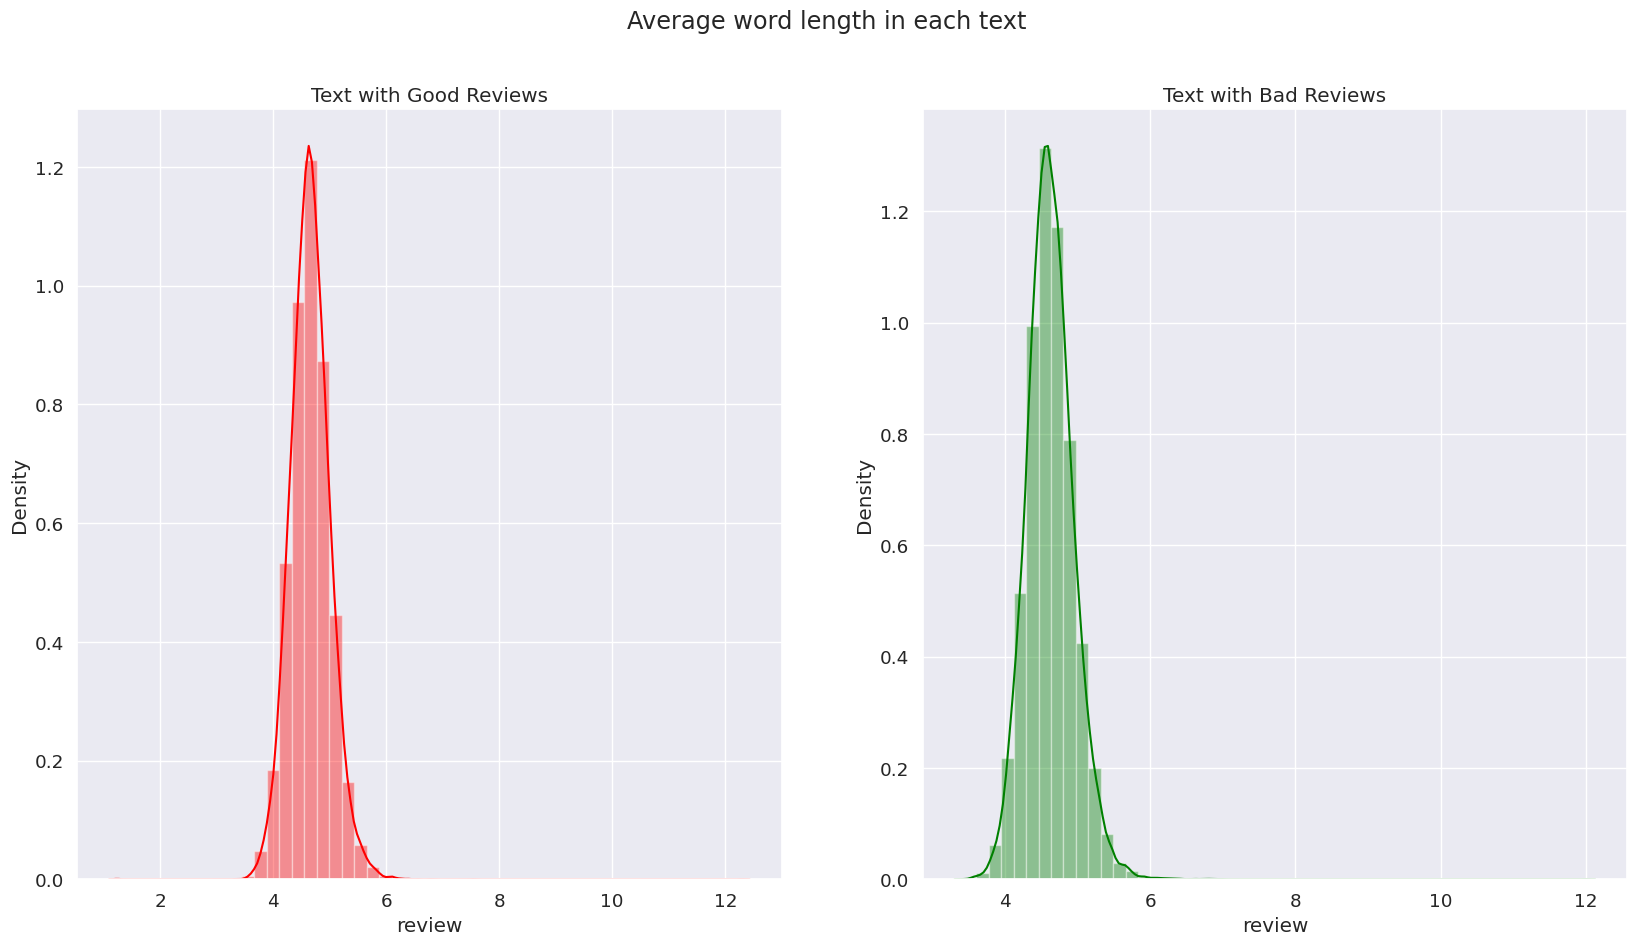

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['sentiment']=='positive']['review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Text with Good Reviews')
word=df[df['sentiment']=='negative']['review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Average word length in each text')

# ***REVIRE CLASSSIFIER USING NAIVE BAYES***

In [ ]:
import numpy as np
import pandas as pd
import sklearn

In [ ]:
df=pd.read_csv('IMDB Dataset.csv')

In [ ]:

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
#cleaning the text like <br/> tag
from bs4 import BeautifulSoup
import re

def strip(text):
    soup = BeautifulSoup(text, "html.parser")
    text = re.sub('\[[^]]*\]', '', soup.get_text())
    pattern = r"[^a-zA-z0-9\s,']"
    text = re.sub(pattern, '', text)
    return text

df['review'] = df['review'].apply(strip)
df.head()

<ipython-input-19-af1ee29f29ff>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,Petter Mattei's Love in the Time of Money is a...,positive


In [ ]:
!pip install nltk
from nltk import word_tokenize
import nltk

nltk.download('punkt_tab')

df['review'] = df['review'].apply(word_tokenize)
df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,review,sentiment
0,"[One, of, the, other, reviewers, has, mentione...",positive
1,"[A, wonderful, little, production, The, filmin...",positive
2,"[I, thought, this, was, a, wonderful, way, to,...",positive
3,"[Basically, there, 's, a, family, where, a, li...",negative
4,"[Petter, Mattei, 's, Love, in, the, Time, of, ...",positive


In [ ]:
def lowercase(tokens):
    return [token.lower() for token in tokens]
df['review'] = df['review'].apply(lowercase)
df.head()

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",positive
1,"[a, wonderful, little, production, the, filmin...",positive
2,"[i, thought, this, was, a, wonderful, way, to,...",positive
3,"[basically, there, 's, a, family, where, a, li...",negative
4,"[petter, mattei, 's, love, in, the, time, of, ...",positive


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]
df['review'] = df['review'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, 's, family, little, boy, jake, thi...",negative
4,"[petter, mattei, 's, love, time, money, visual...",positive


In [ ]:
import string
def remove_punctuation(tokens):
    return [token for  token in tokens if token not in string.punctuation]
df.head()

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, 's, family, little, boy, jake, thi...",negative
4,"[petter, mattei, 's, love, time, money, visual...",positive


In [ ]:
from sklearn.model_selection import train_test_split
df['review'] = df['review'].apply(lambda tokens: ' '.join(tokens))
x = df['review']
y = df['sentiment']

In [ ]:
from sklearn.preprocessing import LabelEncoder

#sentiment is positive and negative we need to convert it to 0,1
le = LabelEncoder()
y = le.fit_transform(df["sentiment"])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [ ]:
print(x_train_cv.shape)
print(x_test_cv.shape)

(37500, 5000)
(12500, 5000)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_cv,y_train)

MultinomialNB()

In [ ]:
y_pred=nb.predict(x_test_cv)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
# Print metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.849
Precision: 0.849
Recall: 0.845
F1 Score: 0.847


# ***USING LOGISTIC REGRESSION***

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train_cv,y_train)
y_pred = lg.predict(x_test_cv)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
# Print metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.873
Precision: 0.866
Recall: 0.881
F1 Score: 0.873


# ***USING CNN1D***

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant

In [ ]:
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train) #Converting text to a vector of word indexes
test_sequences = tokenizer.texts_to_sequences(x_test)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 179104 unique tokens.


In [ ]:
x_train = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
y_train = to_categorical(np.asarray(y_train))
y_test = to_categorical(np.asarray(y_test))

In [ ]:
cnnmodel = Sequential()
cnnmodel.add(Embedding(MAX_NUM_WORDS, 128))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(GlobalMaxPooling1D())
cnnmodel.add(Dense(128, activation='relu'))
cnnmodel.add(Dense(2, activation='softmax'))

cnnmodel.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
#Train the model. Tune to validation set.
cnnmodel.fit(x_train, y_train,
          batch_size=128,
          epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 101s 322ms/step - acc: 0.5900 - loss: 0.6370 - val_acc: 0.8578 - val_loss: 0.3307
Epoch 2/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 72s 88ms/step - acc: 0.8823 - loss: 0.2832 - val_acc: 0.8498 - val_loss: 0.3385
Epoch 3/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - acc: 0.9248 - loss: 0.1992 - val_acc: 0.8741 - val_loss: 0.3200
Epoch 4/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - acc: 0.9513 - loss: 0.1367 - val_acc: 0.8625 - val_loss: 0.3772
Epoch 5/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - acc: 0.9717 - loss: 0.0840 - val_acc: 0.8768 - val_loss: 0.4053
Epoch 6/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - acc: 0.9882 - loss: 0.0406 - val_acc: 0.8531 - val_loss: 0.6433
Epoch 7/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - acc: 0.9912 - loss: 0.0301 - val_acc: 0.8738 - val_loss: 0.6803
Epoch 8/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - acc: 0.9962 - loss: 0.0130 - val_acc: 0.7995 - val_loss: 1.6693
Epoch 9/10
293/293 ━━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred=cnnmodel.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
# Print metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.877
Precision: 0.873
Recall: 0.879
F1 Score: 0.876


array([1, 0])

# ***USING RNN***

In [ ]:

from tensorflow.keras.layers import SimpleRNN
y_test_cat = to_categorical(np.asarray(y_test))
# Define the RNN model
rnnmodel = Sequential()
rnnmodel.add(Embedding(MAX_NUM_WORDS, 128))
rnnmodel.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
rnnmodel.add(Dense(2, activation='sigmoid'))

# Compile the model
rnnmodel.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

print('Training the RNN')

# Train the model
rnnmodel.fit(x_train, y_train,
             batch_size=32,
             epochs=10,
             validation_data=(x_test, y_test_cat))

Training the RNN
Epoch 1/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 129s 108ms/step - accuracy: 0.5393 - loss: 0.6975 - val_accuracy: 0.6120 - val_loss: 0.6479
Epoch 2/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 140s 107ms/step - accuracy: 0.6211 - loss: 0.6401 - val_accuracy: 0.6231 - val_loss: 0.6310
Epoch 3/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 122s 104ms/step - accuracy: 0.6607 - loss: 0.6053 - val_accuracy: 0.6357 - val_loss: 0.6126
Epoch 4/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 122s 104ms/step - accuracy: 0.7072 - loss: 0.5568 - val_accuracy: 0.6482 - val_loss: 0.6091
Epoch 5/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 145s 107ms/step - accuracy: 0.7420 - loss: 0.5145 - val_accuracy: 0.6533 - val_loss: 0.6158
Epoch 6/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 139s 104ms/step - accuracy: 0.7627 - loss: 0.4827 - val_accuracy: 0.6587 - val_loss: 0.6247
Epoch 7/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 142s 104ms/step - accuracy: 0.7847 - loss: 0.4464 - val_accuracy: 0.6684 - val_loss: 0.6428
Epoch 8/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 142

In [ ]:
y_pred=rnnmodel.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
# Print metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step
Accuracy: 0.699
Precision: 0.683
Recall: 0.733
F1 Score: 0.707


# ***USING LSTM***

In [ ]:
lstmmodel = Sequential()
lstmmodel.add(Embedding(MAX_NUM_WORDS, 128))
lstmmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstmmodel.add(Dense(2, activation='sigmoid'))
lstmmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Training the RNN')

lstmmodel.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test_cat))

Training the RNN
Epoch 1/10
   6/1172 ━━━━━━━━━━━━━━━━━━━━ 36:17 2s/step - accuracy: 0.4577 - loss: 0.6935

KeyboardInterrupt: 

In [ ]:
y_pred=lstmmodel.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
# Print metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")